<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 12</h1>
</div>

1. Modules and paths
    1. Importing paths via `use`
    2. Structs inside modules
    3. Separating modules into multiple files
5. Crates: What are they?
6. Using external crates: `rand` (random numbers) and `csv` (reading csv)
7. Libraries and other Binaries
8. File I/O
9. Networking Basics

See §7 -- [Managing Growing Projects with Packages, Crates, and Modules](https://doc.rust-lang.org/book/ch07-00-managing-growing-projects-with-packages-crates-and-modules.html)


# Project Considerations (and current homework)

In your final project you are supposed to analyze a dataset using the Rust language and what you have learned in class.  Here are some possible sources of datasets for you to consider.

* Stanford Large Network Dataset Collection: https://snap.stanford.edu/data/
    * See for example https://snap.stanford.edu/data/ego-Gplus.html
* Big Graph Analytics: https://lgylym.github.io/big-graph/dataset.html
* UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php
* Kaggle: https://www.kaggle.com/datasets
* UNdata: https://data.un.org/
* Free Public Data Sets for Analysis: https://www.tableau.com/learn/articles/free-public-data-sets
* Crowdsourced list of large data sets: https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public?share=1
* Interesting Data Sets: https://piktochart.com/blog/100-data-sets/
* Earthdata: https://search.earthdata.nasa.gov/search
* Nasdaq Data Link: https://data.nasdaq.com/search?filters=%5B%22Free%22%5D
* US Government’s open data: https://www.data.gov
* Harvard Dataverse: https://dataverse.harvard.edu

Or any other dataset you choose.

## Project Expectations

* large, meaningful dataset (
* 150+ lines of code
* modules
* tests
* good write up


# 1. Modules

Up to now: **our** functions and data types (mostly) in the same namespace:

* **exception:** functions in structs and enums

One can create a namespace, using `mod`

In [2]:
mod things_to_say {
    fn say_hi() {
        say("Hi");
    }
    
    fn say_bye() {
        say("Bye");
    }
    
    fn say(what: &str) {
        println!("{}!",what);
    }
}

You have to use the module name to refer to access a function.

In [3]:
things_to_say::say_hi();

Error: function `say_hi` is private

## Modules

* By default, all definitions in the namespace are private.
* Advantage: Can hide all internally used code
* Use `pub` to make functions or types public

In [4]:
mod things_to_say {
    pub fn say_hi() {
        say("Hi");
    }
    
    pub fn say_bye() {
        say("Bye");
    }
    
    fn say(what: &str) {
        println!("{}!",what);
    }
}

In [5]:
things_to_say::say_hi();

Hi!


### Why modules?

* limit number of additional identifiers in the main namespace

* organize your codebase into meaningful parts

* hide auxiliary internal code


* By default, all definitions in the namespace are private.
* Advantage: one can hide all internally used code
* Use `pub` to make functions or types public

## Nesting possible

In [6]:
mod level_1 {

    mod level_2_1 {

        mod level_3 {

            pub fn where_am_i() {println!("3");}

        }

        pub fn where_am_i() {println!("2_1");}
        
    }
    
    mod level_2_2 {
        
        pub fn where_am_i() {println!("2_2");}
        
    }
    
    pub fn where_am_i() {println!("1");}
    
}

In [8]:
level_1::level_2_1::level_3::where_am_i();

Error: module `level_2_1` is private

In [9]:
mod level_1 {

    pub mod level_2_1 {

        pub mod level_3 {

            pub fn where_am_i() {println!("3");}

        }

        pub fn where_am_i() {println!("2_1");}
        
    }
    
    pub mod level_2_2 {
        
        pub fn where_am_i() {println!("2_2");}
        
    }
    
    pub fn where_am_i() {println!("1");}
    
}

In [10]:
level_1::level_2_2::where_am_i();

2_2


```
level_1
├── level_2_1
│   └── level_3
│       └── where_am_i
│   └── where_am_i
├── level_2_2
│   └── where_am_i
└── where_am_i
```

## Paths to modules

In [2]:
pub mod level_1 {

    pub mod level_2_1 {
        
        pub mod level_3 {

            pub fn where_am_i() {println!("3");}
            
            pub fn call_someone_else() {
                where_am_i();
            }
        }

        pub fn where_am_i() {println!("2_1");}
    }
    
    pub mod level_2_2 {
        
        pub fn where_am_i() {println!("2_2");}
        
    }
    
    pub fn where_am_i() {println!("1");}
    
}

fn where_am_i() {println!("main namespace");}

In [3]:
level_1::level_2_1::level_3::call_someone_else();

3


## Paths to modules

**Global paths:** start from `crate`

In [23]:
mod level_1 {
    pub mod level_2_1 {
        pub mod level_3 {
            pub fn where_am_i() {println!("3");}
            
            pub fn call_someone_else() {
                crate::where_am_i();
                crate::level_1::level_2_2::
                    where_am_i();
                where_am_i();
            }
        }
        pub fn where_am_i() {println!("2_1");}
    }
    pub mod level_2_2 {   
        pub fn where_am_i() {println!("2_2");}
    }
    
    pub fn where_am_i() {println!("1");}
}

fn where_am_i() {println!("main namespace");}

In [24]:
level_1::level_2_1::level_3::call_someone_else();

main namespace
2_2
3


## Paths to modules

**Local paths:**
* going one or many levels up via `super`

In [25]:
mod level_1 {
    pub mod level_2_1 {
        pub mod level_3 {
            pub fn where_am_i() {println!("3");}
            
            pub fn call_someone_else() {
                super::where_am_i();
                super::super::where_am_i();
                super::super::
                    level_2_2::where_am_i();
            }
        }
        pub fn where_am_i() {println!("2_1");}
    }
    pub mod level_2_2 {   
        pub fn where_am_i() {println!("2_2");}
    }
    
    pub fn where_am_i() {println!("1");}
}

fn where_am_i() {println!("main namespace");}

In [26]:
level_1::level_2_1::level_3::call_someone_else();

2_1
1
2_2


## `use` to import things into the current scope


In [10]:
mod level_1 {
    pub mod level_2_1 {
        pub mod level_3 {
            pub fn where_am_i() {println!("3");}
            
            pub fn call_someone_else() {
                super::where_am_i();
            }
        }
        pub fn where_am_i() {println!("2_1");}
    }
    pub mod level_2_2 {   
        pub fn where_am_i() {println!("2_2");}
    }
    
    pub fn where_am_i() {println!("1");}
}

fn where_am_i() {println!("main namespace");}



In [11]:
// Bring a submodule to current scope:
use level_1::level_2_1::level_3;
level_3::where_am_i();
// Bring a specific function/type to current scope:
// (Don't do that, it can be confusing).
use level_3::call_someone_else();
call_someone_else();
// Bring multiple items to current scope:
use level_3::{where_am_i,call_someone_else};
where_am_i();

3
2_1
3


## Structs within modules

In [2]:
pub mod test {
    #[derive(Debug)]
    pub struct Point {
       x: i32,
       y: i32,
    }

    impl Point {
        pub fn create(x:i32,y:i32) -> Point {
            Point{x,y}
        }
        
    }

}


In [3]:
use test::Point;
let mut p = Point::create(2,3);
println!("{:?}",p);
p.x = 3;
println!("{:?}",p);

Error: field `x` of struct `Point` is private

## Structs within modules

Make fields and functions public to be accessible

In [10]:
mod test {
    #[derive(Debug)]
    pub struct Point {
       pub x: i32,
       y: i32,
    }

    impl Point {
        pub fn create(x:i32,y:i32) -> Point {
            Point{x,y}
        }
        
        pub fn update_y(&mut self, y:i32) {
            self.y = y;
        }
    }

}


In [11]:
use test::Point;
let mut p = Point::create(2,3);
println!("{:?}",p);
p.x = 3;
println!("{:?}",p);

p.update_y(2022);
p

Point { x: 2, y: 3 }
Point { x: 3, y: 3 }


Point { x: 3, y: 2022 }

## Starting point: examples from last week

* Creating a graph representation
* Counting triangles
* Also: get a neighbor of a vertex

<br><br>
<div align="center">
    <b>[example: triangles-ver_1-one-file]</b>
</div>

## Moving a module to separate file

Content of module `abc`
* either in `src/abc.rs`
* or `src/abc/mod.rs`

In `main.rs` replace it with `mod abc;`

**Submodules:**

Example `abc::def`
* either in `src/abc/def.rs`
* or in `src/abc/def/mod.rs`

Use `mod` recursively

<div align="center">
    <b>[live demo: splitting the sample file into <code>main.rs</code> two modules, and one submodule]</b>
</div>

# 2. What are crates?

Crates provided by a project:
* __Binary Crate:__ Programs you compile to an executable and run.
    * Each must have a `main()` function that is the program entry point
    * So far we have seen single binaries
* __Library Crate:__ Define functionality than can be shared with multiple projects.
    * Do _not_ have a `main()` function
    * A single library crate: can be used by other projects 

# 3. Shared crates

**Where to find crates:**
* Official list: https://crates.io
* Unofficial list: https://lib.rs (including ones not yet promoted to crates.io)

**Documentation:**
* https://docs.rs

## Crate `rand`: random numbers
See: https://crates.io/crates/rand

Tell Rust you want to use it:

* edit `Cargo.toml`
* add `rand="0.8.5"` below dependencies

**Question:** Why put `0.8.5` in `Cargo.toml`?

To generate a random integer from $1$ through $100$:
  * add `use rand::Rng`
  * then `rand::thread_rng().gen_range(1..=100)`

<div align="center">
    <b>[live demo: add <code>get_random</code> to <code>graphs::neighbors</code>]</b>
</div>

**Question:** What happens if we move to an upgraded `rand`?

## Crate `csv` and `serde`: reading a CSV file
See:
  * https://crates.io/crates/csv
  * https://crates.io/crates/serde

<br><br>
<div align="center">
    <b>[example: read_csv_simple]</b>
</div>

```sh
cargo run -- pizza.csv true
```

* Create a new project
* Add to `Cargo.toml`:
```
   csv = "1.1.6"
   serde = "1.0.136"
```

* Copy the second example from the `csv` docs
* Update the field names

## Crate `csv` (and `serde`): reading a CSV file

**Solution:** modify `Cargo.toml` for `serde`
```
serde = { version = "1.0.136", features = ["derive"] }
```

**Our case:** add this before `Record` to supress warnings
```
#[allow(dead_code,non_snake_case)]
```

**Bottom line:**
* parameters other than the version number possible in `Cargo.toml`

# 4. Using Multiple Libraries or Binaries in your Project

* So far, we went from a single source file, to multiple source files organized as Modules.

* But we built our projects into single binaries with `cargo build` or `cargo run`.

* We can also build multiple binaries.

When we create a new program with `cargo new my_program`, it creates a folder

```
.
├── Cargo.toml
└── src
    └── main.rs
```

And Cargo.toml has:
```
[package]
name = "my_program"
version = "0.1.0"
edition = "2021"

[dependencies]
```

Our program is considered **Rust package** with the source in `src/main.rs` that compiles (`cargo build my_program`) into a single binary at `target/debug/my_program`.

### The Rust Module System

* **Packages:** Cargo's way of organizing, building, testing, and sharing crates
    * It's a bundle of one or more crates.
* **Crates:** A tree of modules that produces a library or executable
* **Modules and `use`:** Let you control the organization, scope, and privacy of paths
* **Paths:** A way of naming an item, such as a struct, function, or module, e.g. `my_library::library1::my_function`

> A package can contain as many binary crates as you want, but only one library crate.

By default `src/main.rs` is the crate root of a binary crate with the same name as the package (e.g. `my_program`).

Also by default, `src/lib.rs` would contain a library crate with the same name as the package and `src/lib.rs` is its crate root.

### How to add multiple binaries to your project

[[bin]]  
name = "some_name"  
path = "some_directory/some_file.rs"  

**The file some_file.rs must contain a fn main()**


### How to add a library to your project

[lib]  
name = "some_name"  
path = "src/lib/lib.rs"  

**The file lib.rs does not need to contain a fn main()**

> You can have as many binaries are you want in a project but only one library!

See `simple_package` example.

## Relying on external projects

Things to consider about external libraries:
* trustworthy?
* stable?
* long–term survival?
* do you really need it?

Many things best left to professionals:

<div align="center">
    <b><font color="red">Never implement your own cryptography!</font></b>
</div>

Implementing your own things can be a great educational experience!

## Extreme example

Yanking a published module version.
https://www.theregister.com/2016/03/23/npm_left_pad_chaos/

<br>
<div align="center">
    <img src="left-pad.png" alt="[article about left-pad]" width="35%">
</div>
</br>

Rust and `cargo`: can't delete libraries that were published

# 5. File I/O

See also [file_io](./file_io).

In [2]:
:dep rand="0.8.5"

use std::fs::File;        // object providing access to an open file on filesystem
use std::io::prelude::*;  // imports common I/O traits
use rand::Rng;


fn generate_file(path: &str, n: usize) {
    // Generate a random file of edges for vertices 0.n

    // Create a file at `path` and return Result<File> or error
    // .expect() unwraps the Result<File> or prints error and panics
    let mut file = File::create(path).expect("Unable to create file");
    
    for i in 0..n {
        // How many neighbors will this node have
        let rng = rand::thread_rng().gen_range(0..20) as usize;
        
        for _j in 0..rng {
            // Randomly select a neighbor (even with duplicates but not to ourselves)
            let neighbor = rand::thread_rng().gen_range(0..n) as usize;
            if neighbor != i {
                let s: String = format!("{} {}\n", i, neighbor);
                file.write_all(s.as_bytes()).expect("Unable to write file");
            }
        }
    }
}

fn read_file(path: &str) -> Vec<(u32, u32)> {
    let mut result: Vec<(u32, u32)> = Vec::new();
    let file = File::open(path).expect("Could not open file");
    let buf_reader = std::io::BufReader::new(file).lines();
    for line in buf_reader {
        let line_str = line.expect("Error reading");
        let v: Vec<&str> = line_str.trim().split(' ').collect();
        let x = v[0].parse::<u32>().unwrap();
        let y = v[1].parse::<u32>().unwrap();
        result.push((x, y));
    }
    return result;
}

println!("Generating file");
generate_file("list_of_edges.txt", 10);
let edges = read_file("list_of_edges.txt");
println!("{:?}", edges);

Generating file
[(0, 5), (0, 9), (0, 1), (0, 8), (0, 2), (0, 2), (0, 1), (0, 6), (0, 8), (0, 9), (1, 6), (1, 6), (1, 4), (2, 7), (2, 7), (2, 1), (2, 1), (2, 8), (2, 6), (3, 0), (3, 1), (3, 2), (3, 8), (3, 2), (3, 8), (3, 0), (3, 4), (3, 8), (3, 7), (3, 8), (3, 0), (3, 8), (3, 2), (3, 6), (3, 8), (3, 4), (4, 7), (4, 2), (4, 0), (4, 5), (4, 0), (4, 9), (4, 2), (4, 2), (4, 9), (4, 7), (4, 3), (4, 9), (4, 9), (5, 8), (5, 0), (5, 3), (5, 4), (5, 2), (5, 4), (5, 9), (6, 3), (6, 7), (6, 9), (6, 3), (6, 7), (6, 7), (6, 4), (6, 0), (6, 3), (6, 8), (6, 0), (6, 9), (6, 5), (7, 4), (7, 9), (7, 3), (7, 6), (7, 3), (7, 9), (7, 1), (7, 8), (7, 1), (7, 2), (7, 2), (8, 2), (8, 0), (8, 1), (8, 3), (8, 7), (8, 5), (8, 4), (9, 2), (9, 3), (9, 4), (9, 5), (9, 4), (9, 2), (9, 5), (9, 2)]


# In Class Poll

https://piazza.com/class/m5qyw6267j12cj/post/283



# 6. Networking Basics

1. The OSI Stack
2. IP
3. TCP
4. DNS
5. HTTP

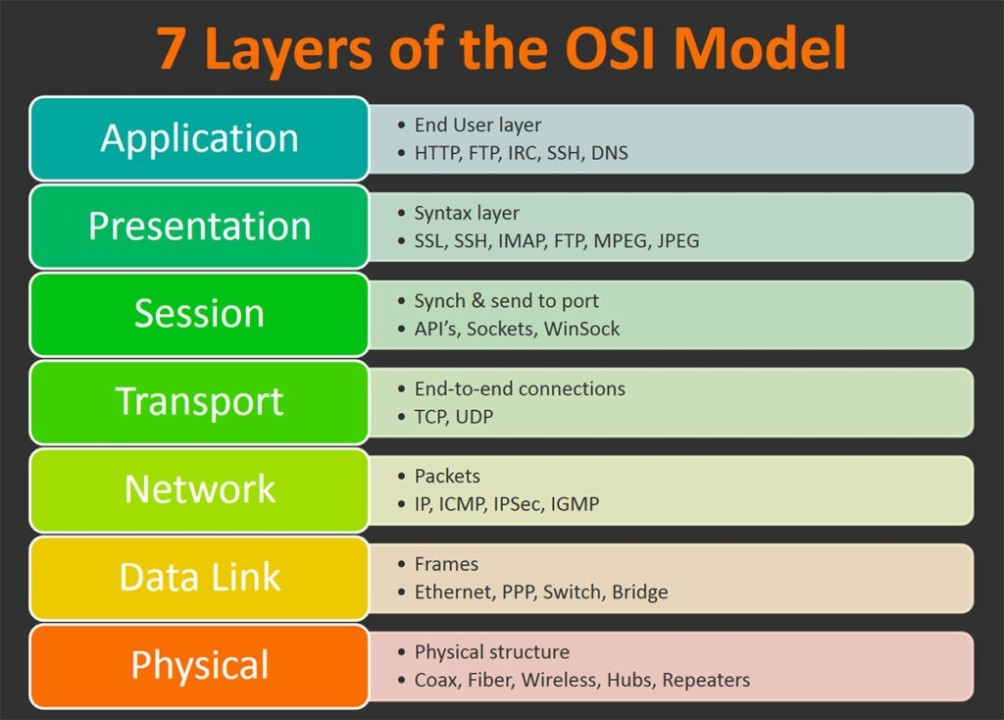

See https://en.wikipedia.org/wiki/OSI_model

## Some key networking protocols

* IP -> Internet Protocol:  Provides names (addresses) to devices and allows them to become reachable.
* TCP -> Transmission Control Protocol: Make communication reliable, cooperative and fast
* DNS -> Domain Name System: Allow mnemonic names for devices and provide translation between those and IPs
* HTTP -> HyperText Transfer Protocol: Connectionless/Stateless Transfers.  Media Independent.  Human readable (sort of)

## 1. IP

* IPv4 -- 32 bit addresses commonly written as x.y.z.w with values ranging from 0-255
  * subnets defined with /.  E.g. 10.0.0.0/8 implies all addresses that start with 10. while 10.0.0.0/16 implies all addresses that start with 10.0
  * $2^{32} = 4.3\textrm{B}$ addresses
* IPv6 -- 128 bit addresses commonly written as a:b:v:d:e:f:g:h
  * prefixes defined with same notation 2001:db1:abc1:0012::0/64 implies all addresses that start with 2001:db1:abc1:0012
  * first 48 bits identify the network, next 16 bits the subnetwork and last 64 bits the device within the network.
  * $2^{128} = 3.4\textrm{E38}$ addresses
* Use arin.net (or ripe.net, apnic.net, lacnic.net, afrinic.net, …) to find out who a particular ip address belongs to.


* Private IP addresses
  * 0.0.0.0/8 -> Shorthand for the network I am in.  Not routable.  0.0.0.0 is the current host.
  * 10.0.0.0/8 -> Private network not accessible from the internet
  * 100.64.0.0/10 -> Used by ISPs with carrier grade NATs
  * 127.0.0.0/8 -> Localhost addresses
  * 172.16.0.0/12 -> Private network
  * 192.0.0.0/24 -> Private network
  * 192.168.0.0/16 -> Private network
* Full list: https://en.wikipedia.org/wiki/Reserved_IP_addresses


```sh
# local addresses
% ifconfig
...
en0: flags=8863<UP,BROADCAST,SMART,RUNNING,SIMPLEX,MULTICAST> mtu 1500
        options=6460<TSO4,TSO6,CHANNEL_IO,PARTIAL_CSUM,ZEROINVERT_CSUM>
        ether 5c:e9:1e:ba:58:b0
        inet6 fe80::45e:af7b:b1dd:88a1%en0 prefixlen 64 secured scopeid 0xe 
        inet6 fd84:8c48:b4b:854b:1c97:ad2d:f06e:67a1 prefixlen 64 autoconf secured 
        inet 192.168.1.30 netmask 0xffffff00 broadcast 192.168.1.255
        nd6 options=201<PERFORMNUD,DAD>
        media: autoselect
        status: active
...

# local IPv4 address
% ipconfig getifaddr en0
192.168.1.30

# see my public/external IP address
% curl ifconfig.me  
2600:8805:a284:c400:81a1:8b01:24d:c0e5
```


## IP header

<div align="center">
<img src="./IPv4_Packet-en.svg" alt="IPv4 Packet" width="70%">
</div>

```sh
% traceroute google.com
traceroute to google.com (142.251.35.174), 64 hops max, 40 byte packets
 1  192.168.0.1 (192.168.0.1)  2.876 ms  2.281 ms  2.024 ms
 2  10.4.64.1 (10.4.64.1)  11.972 ms  11.388 ms  11.960 ms
 3  100.124.126.28 (100.124.126.28)  12.305 ms  11.527 ms  12.001 ms
 4  100.120.244.54 (100.120.244.54)  12.338 ms  16.537 ms  15.036 ms
 5  nyrkbprj01-ae3.rd.cox.net (68.1.5.157)  20.929 ms  23.460 ms  29.014 ms
 6  68.105.31.78 (68.105.31.78)  22.041 ms
    68.105.31.73 (68.105.31.73)  17.014 ms
    68.105.31.78 (68.105.31.78)  20.347 ms
 7  * * *
 8  142.251.64.5 (142.251.64.5)  17.934 ms
    108.170.236.88 (108.170.236.88)  18.862 ms
    142.251.64.7 (142.251.64.7)  17.590 ms
 9  lga25s78-in-f14.1e100.net (142.251.35.174)  16.999 ms  18.688 ms
    192.178.106.156 (192.178.106.156)  17.882 ms
```

## Why do packet get lost?

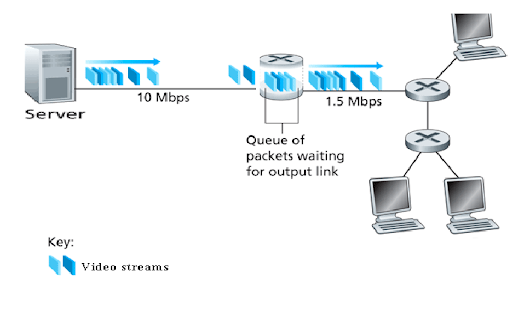

## 3. DNS

* A widely distributed collection of databases that translate between names and IP addresses
* A protocol for talking to those databases
* A schema for inserting/deleting/updating these databases


## The DNS Hierarchy

<div align="center">
<img src="./Domain_name_space.svg" alt="DNS Hierarchy" width="70%">
</div>

```sh
% nslookup google.com
Server:         68.105.28.11
Address:        68.105.28.11#53

Non-authoritative answer:
Name:   google.com
Address: 142.250.80.110
```

### The .tv top level domain

Every country is assigned an internet country code top level domain (ccTLD).

A tiny country of Tuvalu was assigned .tv as its ccTLD.

<div align="center">
<img src="./Tuvalu_on_the_globe_(Polynesia_centered).svg" alt="Tuvalu" width="40%">
</div>

Facts:
- Area: 26 km2
- Population: 11,000

As of 2019, 8.4% of the revenue (10s of millions of dollars) of the government came from .tv royalties.

https://en.wikipedia.org/wiki/.tv



## 4. HTTP

* Built on top of TCP (or UDP more recently)
* Most commonly built on top of TLS (HTTPS)
* Connectionless and Stateless (A request does not depend on other requests, though it can have side-effects on the server)
* Media independent (payload is independent of the protocol, and negotiated as part of the protocol)

* URL vs URI vs URN
  * URL (Uniform Resource Locator) -- A name identifying a resource that can be fetched with HTTP (i.e. http://www.google.com)
  * URI (Uniform Resource Identifier) -- A name identifying a resource that may or may not be fetchable (URLs are URIs but not vice-versa) (i.e. xmlns:recipe = "https://chef.com/recipe")
  * URN (Uniform Resource Name) -- A name identifying a resource in a unique permanent way but not how to fetch it (i.e. urn:isbn:1234567890


## Protocol Information

* Version: HTTP/1.0, HTTP/1.1, HTTP/2.0, HTTP/3.0
  * Last 2 must be encrypted over TLS
* Message: Can contain headers and bodies
  * Headers are always human readable, key-value pairs
  * Bodies can be text or arbitrary binary data
* Request methods
* GET, HEAD, POST, PUT, DELETE, (CONNECT, OPTIONS, TRACE)
  * PUT vs POST
    * POST implies sending the server some data and letting the server decide which object they affect
    * PUT specifies the object and replaces its value with what is provided


## HTTP Responses

* 1xx -- Informational.  Request was received and being processed (an extra response will follow)
* 2xx -- Success.  Request was processed successfully
* 3xx -- Redirect.  The name of the resource has changed and more client action is required to complete the requests
* 4xx -- Client error.  Something about the resource being requested is wrong.
* 5xx -- Server error. The server encountered an error and could not process the request
